# DECISIONTREEREGRESSOR

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Bitcoin.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [3]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [4]:
del data['Stock Splits']
del data['Dividends']
del data['Date']

In [5]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [6]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
df=data.dropna()
df.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


In [8]:
x=df.drop(labels='Close',axis=1)
y=df.loc[:,'Close']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print("NUMBER OF TRAIN DATASET:",len(x_train))
print("NUMBER OF TEST DATASET :",len(x_test))
print("TOTAL NUMBER OF DATASET:",len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET: 3073
NUMBER OF TEST DATASET : 769
TOTAL NUMBER OF DATASET: 3842


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  3073
NUMBER OF TEST DATASET      :  769
TOTAL NUMBER OF DATASET    :  3842


In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [13]:
predicted=DTR.predict(x_test)

In [14]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predicted)
print("THE R2 SCORE OF DECISIONTREEREGRESSOR IS :",R2)

THE R2 SCORE OF DECISIONTREEREGRESSOR IS : 0.9992538149476142


In [15]:
from sklearn.metrics import rand_score
RAND = rand_score(y_test,predicted)
print("THE ACCURACY SCORE OF DECISIONTREEREGRESSOR IS :",RAND*100)

THE ACCURACY SCORE OF DECISIONTREEREGRESSOR IS : 99.94141471608148


In [16]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test,predicted)
print("THE EXPLAINED VARIENCE SCORE OF  DECISIONTREEREGRESSOR IS :",EVS)

THE EXPLAINED VARIENCE SCORE OF  DECISIONTREEREGRESSOR IS : 0.9992543297037882


In [17]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predicted)
print("THE MEAN SQUARED ERROR SCORE OF DECISIONTREEREGRESSOR IS :",MSE)

THE MEAN SQUARED ERROR SCORE OF DECISIONTREEREGRESSOR IS : 442143.7890519347


In [18]:
from sklearn.metrics import median_absolute_error
MAE = median_absolute_error(y_test,predicted)
print("THE MEAN ABSOLUTE ERROR SCORE OF DECISIONTREEREGRESSOR IS :",MAE)

THE MEAN ABSOLUTE ERROR SCORE OF DECISIONTREEREGRESSOR IS : 84.6953125


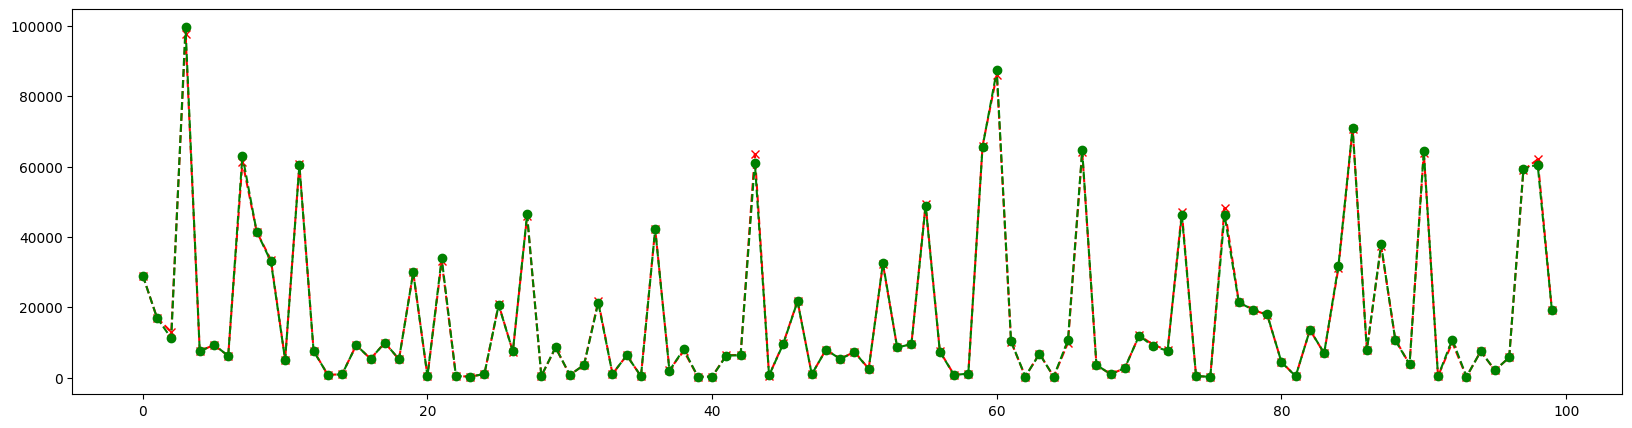

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [20]:
import joblib
joblib.dump(DTR,'BITCOIN1.pkl')

['BITCOIN1.pkl']

In [21]:
# #import ydata_profiling as yp
# import pandas_profiling
# from pandas_profiling import ProfileReport
# from ydata_profiling.model import describe
# prof = ProfileReport(data)
# prof.to_file(output_file='bitcoin.html')